In [ ]:
# Setup Path
from pathlib import Path

dataset_path = Path("C:/Users/arvin/Downloads/Project/image-recognition/datasets")
dataset_path.iterdir()

<generator object Path.iterdir at 0x0000023703CC7060>

In [ ]:
# Cek Folder Dataset
import os
os.listdir(dataset_path)


['test', 'train', 'validation']

In [ ]:
# Cek Folder Dataset
train_dir = os.path.join(dataset_path, "test")
os.listdir(train_dir)[:36]

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [ ]:
# Image Handler (Cek Class & Files)
import tensorflow as tf
import os

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_dir = os.path.join(dataset_path, "train")
val_dir   = os.path.join(dataset_path, "validation")
test_dir  = os.path.join(dataset_path, "test")

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)


c:\Users\arvin\Downloads\Project\image-recognition\venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


Found 3115 files belonging to 36 classes.
Found 351 files belonging to 36 classes.
Found 359 files belonging to 36 classes.


In [ ]:
# def class
class_names = train_ds.class_names
print(class_names)
print("Jumlah kelas:", len(class_names))

['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']
Jumlah kelas: 36


In [43]:
# build model
import tensorflow as tf

layers = tf.keras.layers
models = tf.keras.models
num_classes = len(class_names)
print("num_classes =", num_classes)

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

model = models.Sequential([
    # 1) Normalisasi pixel
    layers.Rescaling(1./255, input_shape=(224, 224, 3)),
    
    data_augmentation, #penambahan data untuk train

    # 2) Convolution: cari pola dasar (blok 1)
    layers.Conv2D(32, (3, 3), activation='relu'), # filter jumlahnya 32
    # 3) Pooling: ringkas informasi
    layers.MaxPooling2D((2, 2)),

    # Blok 2
    layers.Conv2D(64, (3,3), activation='relu'), # filter dibanyakin jadi 64
    layers.MaxPooling2D((2, 2)),
    
    # 7) Ubah feature map jadi vektor  (Global)
    layers.GlobalAveragePooling2D(),
    
    # 8) Fully Connected: ambil keputusan
    layers.Dense(128, activation='relu'),
    
    # 9) Output layer: 36 kelas
    layers.Dense(num_classes, activation='softmax')
])


num_classes = 36


c:\Users\arvin\Downloads\Project\image-recognition\venv\Lib\site-packages\keras\src\layers\preprocessing\data_layer.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [44]:
# hasil model
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_7 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_5 (Sequential)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,356 (126.39 KB)

 Trainable params: 32,356 (126.39 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
# model compile
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [46]:
# Train model
EPOCHS = 15
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS
)


Epoch 1/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 47s 461ms/step - accuracy: 0.0360 - loss: 3.5683 - val_accuracy: 0.0741 - val_loss: 3.4955
Epoch 2/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 44s 446ms/step - accuracy: 0.0732 - loss: 3.3287 - val_accuracy: 0.0883 - val_loss: 3.1413
Epoch 3/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 44s 445ms/step - accuracy: 0.1294 - loss: 3.0511 - val_accuracy: 0.1852 - val_loss: 2.8149
Epoch 4/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 45s 451ms/step - accuracy: 0.1624 - loss: 2.8471 - val_accuracy: 0.2593 - val_loss: 2.6263
Epoch 5/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 45s 452ms/step - accuracy: 0.2010 - loss: 2.7072 - val_accuracy: 0.2735 - val_loss: 2.4620
Epoch 6/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 46s 461ms/step - accuracy: 0.2199 - loss: 2.5947 - val_accuracy: 0.2934 - val_loss: 2.3336
Epoch 7/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 45s 459ms/step - accuracy: 0.2340 - loss: 2.5234 - val_accuracy: 0.3504 - val_loss: 2.2747
Epoch 8/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 45s 452ms/step - accuracy: 0.2382 - loss: 2.4810 - val_accu

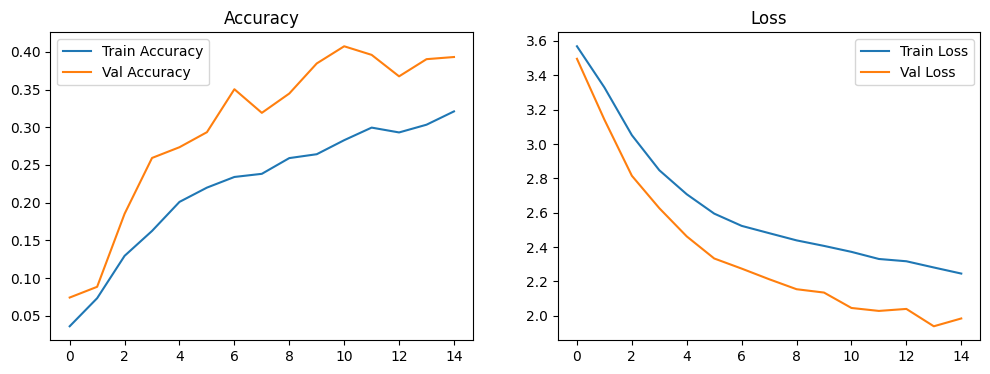

In [47]:
# Visualisasi Hasil

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.show()


In [48]:
# Test Model
test_loss, test_accuracy = model.evaluate(test_ds)

print("Test Loss     :", test_loss)
print("Test Accuracy :", test_accuracy)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step - accuracy: 0.3928 - loss: 1.9877
Test Loss     : 1.9877259731292725
Test Accuracy : 0.3927576541900635
